# Students Performance

Author: Qi Qin

Course Project, UC Irvine, Math 10, S23

## Introduction

My topic is about students' performance. My dataset includes anonymous student information like sex, parental education information, math scores, reading scores, writing scores, and unnamed race groups (group A to E). My goal is trying to relate students' one score to the other two scores as well as predicting the race group by the three scores to see if race influences students' talents or abilities somehow.

## Main part

**To import libraries:**

In [49]:
import pandas as pd
import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

**To set up the dataset:**
We can see that the data contains 1000 rows and 9 columns.

In [2]:
df = pd.read_csv("Student Performance.csv")
df.dropna(axis = 0)
df.shape

(1000, 9)

**To display the data:**

In [3]:
df.head()

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M


**To make column names clearer and more straight-forward:**

In [4]:
df.rename(columns = {"Unnamed: 0": "id"}, inplace = True)
df.rename(columns = {"race/ethnicity": "race"}, inplace = True)
df.rename(columns = {"math percentage": "math score"}, inplace = True)
df.rename(columns = {"reading score percentage": "reading score"}, inplace = True)
df.rename(columns = {"writing score percentage": "writing score"}, inplace = True)

**To know some attributes and learn the number of different values in each column of the data (This line is suggested by chatgpt):**

In [5]:
#suggested by chatgpt
df[df.columns].nunique()

id                             1000
race                              5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
sex                               2
dtype: int64

In [6]:
df.dtypes

id                               int64
race                            object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
sex                             object
dtype: object

In [7]:
df

,id,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,sex
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,4,group C,some college,standard,none,0.76,0.78,0.75,M
...,...,...,...,...,...,...,...,...,...
995,995,group E,master's degree,standard,completed,0.88,0.99,0.95,F
996,996,group C,high school,free/reduced,none,0.62,0.55,0.55,M
997,997,group C,high school,free/reduced,completed,0.59,0.71,0.65,F
998,998,group D,some college,standard,completed,0.68,0.78,0.77,F


**To find some correlations:**

The numbers in the matrix show the relationship between its upper and left column names. The range is from 0 to 1. Large number represents the strong relationship and small number like 0.05ish represents very weak relationship or no any correlations. 

From the matrix right now, we can see that id has nearly no relationship between any of the three scores as the numbers are around 0.05, which is pretty small.

Only numeric columns could use corr to analyze their relationships so the matrix is 4 by 4; however, I also want to analyze something more like sex and race, so I will try to change those columns to numeric types to find something meaningful to analyze.

*corr is the new thing I used, by the matrix, I could find something important to determine which race group the student is in. This function could be a start for further analysis.

In [8]:
relation = df.corr()

In [9]:
relation

,id,math score,reading score,writing score
id,1.000000,0.036827,0.048390,0.057848
math score,0.036827,1.000000,0.817580,0.802642
reading score,0.048390,0.817580,1.000000,0.954598
writing score,0.057848,0.802642,0.954598,1.000000


**To change other columns to something suitable for the "corr" function:**

From nunique function, I could find that "race" and "parental level of education" columns have more than 2 unique values, but "lunch", "prep course", and "sex" columns have only 2 different values. 

So I would like to add the copy of these columns and change "race" and "parental level of education" value to some integers. Also, I will change "lunch", "prep course", "sex" values directly to True and False. 

Finally, import is_numeric _dtype to check whether the result is proper.

In [10]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df["n_race"] = df["race"].replace(
    ["group A", "group B","group C","group D","group E"],
    [1,2,3,4,5])

df["n_ploe"] = df["parental level of education"].replace(
    ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"], 
    [1,2,3,4,5,6])

df.rename(columns = {"lunch":"standardMeal"}, inplace = True)
df["standardMeal"] = df["standardMeal"].replace(
    ["standard", "free/reduced"],[True, False])

df.rename(columns = {"test preparation course": "donePrep"}, inplace = True)
df["donePrep"] = df["donePrep"].replace(
    ["completed", "none"], [True, False])
    
df.rename(columns = {"sex": "isFemale"}, inplace = True)
df["isFemale"] = df["isFemale"]. replace(["F", "M"], [True, False])

In [12]:
df.head()

,id,race,parental level of education,standardMeal,donePrep,math score,reading score,writing score,isFemale,n_race,n_ploe
0,0,group B,bachelor's degree,True,False,0.72,0.72,0.74,True,2,5
1,1,group C,some college,True,True,0.69,0.90,0.88,True,3,3
2,2,group B,master's degree,True,False,0.90,0.95,0.93,True,2,6
3,3,group A,associate's degree,False,False,0.47,0.57,0.44,False,1,4
4,4,group C,some college,True,False,0.76,0.78,0.75,False,3,3


In [13]:
df.columns

Index(['id', 'race', 'parental level of education', 'standardMeal', 'donePrep',
       'math score', 'reading score', 'writing score', 'isFemale', 'n_race',
       'n_ploe'],
      dtype='object')

In [14]:
features = [cols for cols in df.columns if is_numeric_dtype(df[cols])]
features

['id',
 'standardMeal',
 'donePrep',
 'math score',
 'reading score',
 'writing score',
 'isFemale',
 'n_race',
 'n_ploe']

**To find the full correlation matrix:**
From the matrix, we could get that: "writing score" is somehow related to columns other than "id", which makes sense since student id could not determine students' academic performance. The most related two columns are "math score" and the "writing score". This result also makes sense since writing needs both reading abilities and math logic. Maybe I could do a linear regression model for estimating students' math score.

Moreover, we could get the information that: for "race", it is more likely to be related to the "math score", "reading score", and "writing score". I would like to form a model for predicting race groups by these three elements.

In [15]:
re = df.corr()
re

,id,standardMeal,donePrep,math score,reading score,writing score,isFemale,n_race,n_ploe
id,1.000000,-0.033348,0.028029,0.036827,0.048390,0.057848,0.043038,0.026590,-0.044672
standardMeal,-0.033348,1.000000,-0.017044,0.350877,0.229560,0.245769,-0.021372,0.046563,-0.023259
donePrep,0.028029,-0.017044,1.000000,0.177702,0.241780,0.312946,-0.006028,0.017508,-0.007143
math score,0.036827,0.350877,0.177702,1.000000,0.817580,0.802642,-0.167982,0.216415,0.159432
reading score,0.048390,0.229560,0.241780,0.817580,1.000000,0.954598,0.244313,0.145253,0.190908
writing score,0.057848,0.245769,0.312946,0.802642,0.954598,1.000000,0.301225,0.165691,0.236715
isFemale,0.043038,-0.021372,-0.006028,-0.167982,0.244313,0.301225,1.000000,0.001502,0.043934
n_race,0.026590,0.046563,0.017508,0.216415,0.145253,0.165691,0.001502,1.000000,0.095906
n_ploe,-0.044672,-0.023259,-0.007143,0.159432,0.190908,0.236715,0.043934,0.095906,1.000000


**Linear Regression for estimating writing scores:**
I would like to know if math is a better predictor or writing is better for prediction.

From the graph, it seems like the blue dots are more concentrated. To verify the intuition that "reading score" may do well, I built two linear regression model and compare their mean absolute values and mean squared values.

In [16]:
c1 = alt.Chart(df).mark_circle(color = "red").encode(
    x = "math score",
    y="writing score"
)
c2 = alt.Chart(df).mark_circle(color = "blue").encode(
    x = "reading score",
    y = "writing score"
)

In [17]:
c1+c2

alt.LayerChart(...)

In [18]:
regm = LinearRegression()
regr = LinearRegression()

regm.fit(df[["math score"]], df["writing score"])
regr.fit(df[["reading score"]], df["writing score"])

df["predm"] = regm.predict(df[["math score"]])
df["predr"] = regr.predict(df[["reading score"]])

In [19]:
m_mae = mean_absolute_error(df["writing score"], df["predm"])
r_mae = mean_absolute_error(df["writing score"], df["predr"])

In [20]:
m_mae

0.07535246410892701

In [21]:
r_mae

0.03614822225736518

In [22]:
m_mse = mean_squared_error(df["writing score"], df["predm"])
r_mse = mean_squared_error(df["writing score"], df["predr"])

In [23]:
m_mse

0.008206700489132093

In [24]:
r_mse

0.0020470863689389346

**To check whether mae, mse function works well:**
Though we got False, I think the function worked well since 0.03614822225736518(r_mae) and 0.036148222257365116(ra) only have differences in 16th decimal place which may be led by trivial things like rounding up. We coud approximately say that they are the same, so do rs and r_mse.

In [25]:
ra = sum(abs(df["writing score"]-df["predr"]))/len(df)
ra

0.036148222257365116

In [26]:
rs = sum((df["writing score"]-df["predr"])**2)/len(df)
rs

0.002047086368938936

In [27]:
ra == r_mae

False

In [28]:
rs == r_mse

False

**So we got the conclusion that "reading score " is a better prediction for students' "writing score":**

In [29]:
r_mae <= m_mae

True

In [30]:
r_mse <= m_mse

True

**To visualize the findings:**

In [31]:
c3 = alt.Chart(df).mark_line(color = "red").encode(
    x = "math score",
    y= "predm"
)
c4 = alt.Chart(df).mark_line(color = "blue").encode(
    x = "reading score",
    y = "predr"
)

In [32]:
c3+c4

alt.LayerChart(...)

In [33]:
c1+c2+c3+c4

alt.LayerChart(...)

**To visualize in an new way "plotly.express" :**

In [34]:
p1 = px.scatter(df, x = "math score", y = "writing score", color_discrete_sequence=["red"])
p2 = px.scatter(df, x = "reading score", y = "writing score", color_discrete_sequence=["blue"])
p3 = px.line(df,x = "math score", y = "predm", color_discrete_sequence= ["red"])
p4 = px.line(df,x = "math score", y = "predm", color_discrete_sequence= ["blue"])

**To visualize in another new way "seaborn" :**

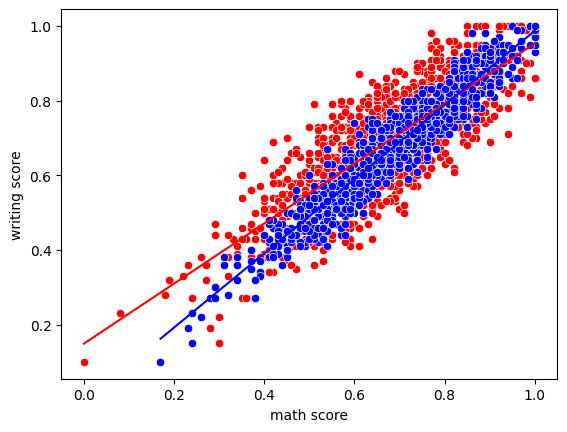

In [35]:
s1 = sns.scatterplot(data = df, x = "math score", y = "writing score", color = "red")
s2 = sns.scatterplot(data = df, x = "reading score", y = "writing score", color = "blue")
s3 = sns.lineplot(data = df, x = "math score", y = "predm", color = "red")
s4 = sns.lineplot(data = df, x = "reading score", y = "predr", color = "blue")

**To predict the race group by academic performances:**

In [36]:
col = ["math score", "reading score", "writing score"]
X_train, X_test, y_train, y_test = train_test_split(
    df[col],
    df["race"],
    train_size = 0.3
)

**Fit in DecisionTreeClassifier to draw the tree diagram:**
The three scores I used to predict the race group are somehow useful but not perfect since when I set max_leaf_nodes = 500, the correction rate of training set is 0.99, but is 0.24 for the testing set. The 0.99 shows overfitting since it seems like the model does not have the ability to predict new values which means it does not understand the data structure but using too many nodes to learn the existed data well.

For conveniently analyzing the tree diagram, I changed the max of leaf nodes back to 7, a relatively small number which is easy to run. 

In [51]:
clf = DecisionTreeClassifier(max_leaf_nodes = 7)
clf.fit(X_train, y_train)
a = clf.score(X_train, y_train)
b = clf.score(X_test, y_test)

In [44]:
a

0.9966666666666667

In [47]:
b

0.24285714285714285

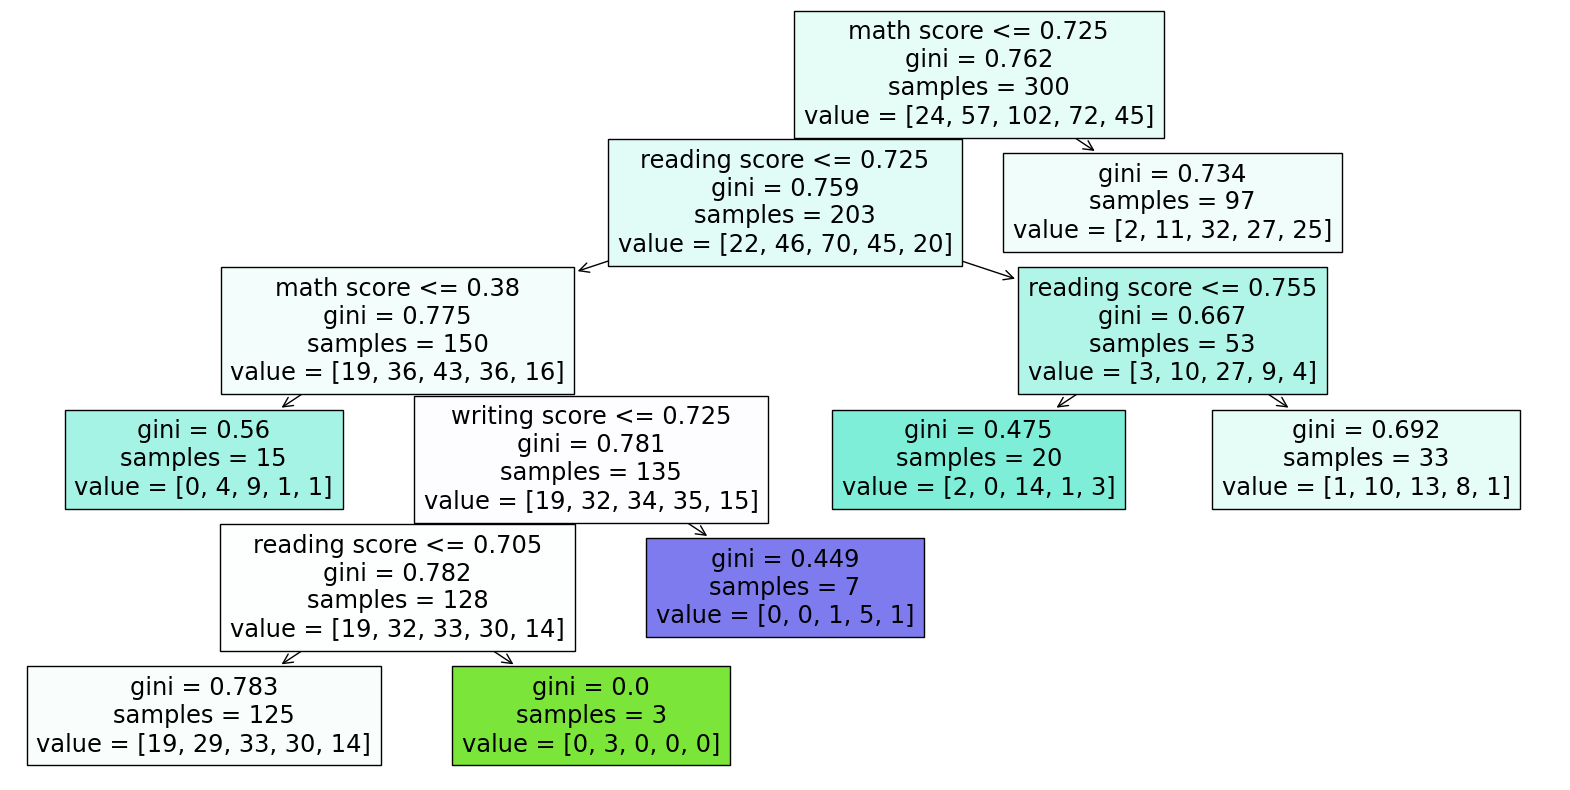

In [52]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)

**Pick two sets of data randomly to check whether the tree plot tells the truth:**

In [63]:
df.sample(2, random_state = 3)

,id,race,parental level of education,standardMeal,donePrep,math score,reading score,writing score,isFemale,n_race,n_ploe,predm,predr
642,642,group B,some high school,False,False,0.72,0.81,0.79,True,2,1,0.728086,0.798085
762,762,group D,some high school,True,True,0.78,0.81,0.86,False,4,1,0.776348,0.798085


First sample: No.642:
math 0.72 < 0.725  go left
reading 0.81 > 0.725   go right
reading 0.81 > 0.755   go right
Get: gini = 0.692, samples = 33, value = [1,10,13,8,1]
Conclusion: It is most likely to be in group C and also likely to be in group B, but not likely to be in group A and E
Real case: No.642 is in group B

We could get similar result by coding:0.393939 is the greatest number which represents that the student is most likely to be in group C

In [65]:
Pred642 = clf.predict_proba(pd.DataFrame({
    "math score": [0.72],
    "reading score": [0.81],
    "writing score": [0.79]
}))
Pred642

array([[0.03030303, 0.3030303 , 0.39393939, 0.24242424, 0.03030303]])

Second sample: No.762:
math 0.78 > 0.725  go right
Get: gini = 0.734, samples = 97, value = [2,11,32,27,25]
Conclusion: It is most likely to be in group C and also likely to be in group D, but not likely to be in group A and B
Real case: No.762 is in group D

We could get similar result by coding:0.32989691 is the greatest number which represents that the student is most likely to be in group C and second likely to be in group D.

In [67]:
Pred762 = clf.predict_proba(pd.DataFrame({
    "math score": [0.78],
    "reading score": [0.81],
    "writing score": [0.86]
}))
Pred762

array([[0.02061856, 0.11340206, 0.32989691, 0.27835052, 0.25773196]])

**Result Analysis:**
We predicted wrong in both case. I think the reason could be that we only have 7 nodes here, which means it is possible that the result deviates from the actual situation a little bit. But the prediction makes some sense since both the true race group located in our predicted second possible category, which could be a good thing.

Moreover, it may deliver another information that the three scores are not that enough nor perfect for predicting students' race. So race somehow affects students' academic performance but not all the case and not the decisive element.

## Summary
* Structure summary

First part introduces the possible correlations between two of every column names. 

Second part is about using math score and reading score for writing score prediction. I built two models, compared their mae and mse to find a better one, and visualized them in three different ways. 

Third part is the classification and the tree diagram of how the three scores determine the students' races or not.

* Analysis summary

Among the matrix, I found two things to deep into, which are how to predict writing score and how to predict the race group of students. Though writings may use both math logic abilities and reading abilities, it is better to predict their writing scores via reading scores instead of the math scores. Races make an influence on their math, reading, and writing scores somehow that the three variables could predict the basic trend of which race groups the student may in and which race groups the student must not in, but not decisive nor perfect. 

## References


* What is the source of your dataset(s)?
From Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

* List any other references that you found helpful.
I asked chatgpt for some help and I already mentioned them before I quoted.
I found corr() useful in this kaggle website. https://www.kaggle.com/code/abhimanyudasarwar/used-cars-price-prediction
I mastered Seaborn graphing techniques from this website. https://python-charts.com/correlation/scatter-plot-seaborn/#:~:text=In%20case%20you%20want%20to%20override%20the%20default,the%20markers%20with%20edgecolor%2C%20which%20defaults%20to%20white.
I learned plotly graphing here with discrete colors. https://plotly.com/python/discrete-color/


## Submission

Using the Share button at the top right, **enable Comment privileges** for anyone with a link to the project. Then submit that link on Canvas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35b3c8f6-b26b-49be-beb1-d437fa63f1b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>